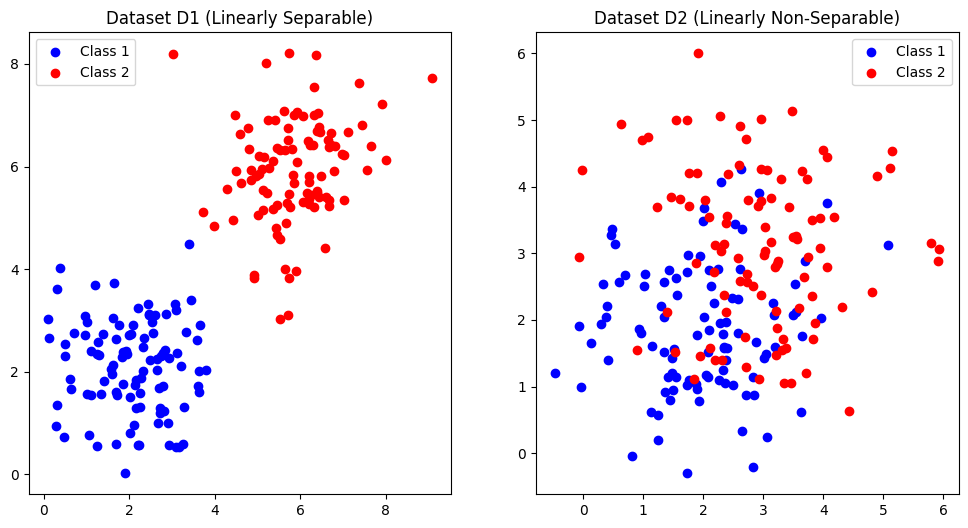

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean1 = [2, 2]
cov1 = [[1, 0.1], [0.1, 1]]
class1_D1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [6, 6]
cov2 = [[1, 0.1], [0.1, 1]]
class2_D1 = np.random.multivariate_normal(mean2, cov2, 100)

mean1 = [2,2]
cov1 = [[1, 0], [0, 1]]
class1_D2 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [3, 3]
cov2 = [[1.3, 0], [0, 1.3]]
class2_D2 = np.random.multivariate_normal(mean2, cov2, 100)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(class1_D1[:, 0], class1_D1[:, 1], color='blue', label='Class 1')
ax[0].scatter(class2_D1[:, 0], class2_D1[:, 1], color='red', label='Class 2')
ax[0].set_title('Dataset D1 (Linearly Separable)')
ax[0].legend()

ax[1].scatter(class1_D2[:, 0], class1_D2[:, 1], color='blue', label='Class 1')
ax[1].scatter(class2_D2[:, 0], class2_D2[:, 1], color='red', label='Class 2')
ax[1].set_title('Dataset D2 (Linearly Non-Separable)')
ax[1].legend()

plt.show()


In this script, we created two different datasets to see how an SVM classifier handles them. Dataset D1 is easy for classifiers because it has two groups that are far apart, with centers at [2, 2] and [6, 6]. This makes it easy for a simple linear classifier to tell the groups apart. On the other hand, Dataset D2 is trickier because the groups are closer together, with centers at [2, 2] and [3, 3], and the second group is more spread out. This overlap is like what you often find in real data, where things aren't perfectly split apart.

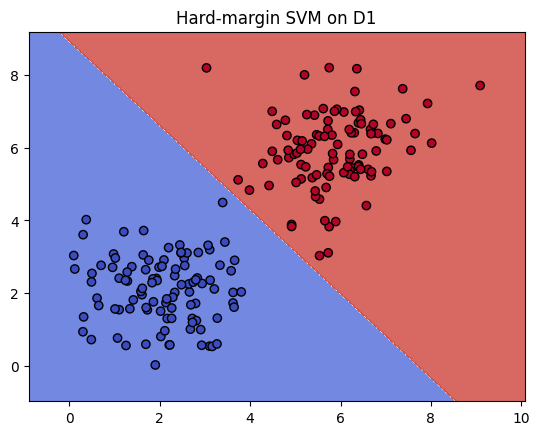

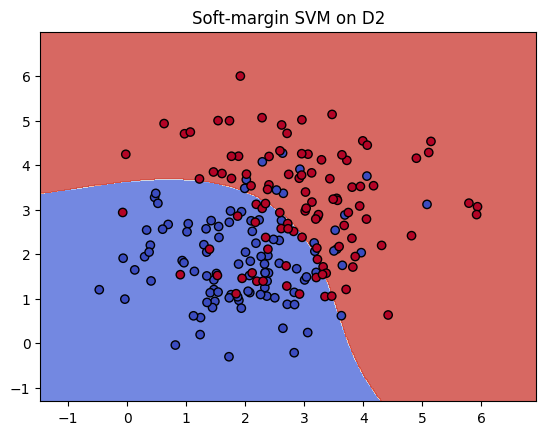

Hard-margin SVM results on D1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0

Soft-margin SVM results on D2:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        21
           1       0.72      0.68      0.70        19

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.72      0.72      0.72        40

Accuracy: 0.725


In [3]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_D1 = np.vstack((class1_D1, class2_D1))
y_D1 = np.array([0]*100 + [1]*100)
X_train_D1, X_test_D1, y_train_D1, y_test_D1 = train_test_split(X_D1, y_D1, test_size=0.2, random_state=42)

X_D2 = np.vstack((class1_D2, class2_D2))
y_D2 = np.array([0]*100 + [1]*100)
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

svm_hard = svm.SVC(kernel='linear', C=1000)
svm_hard.fit(X_train_D1, y_train_D1)
y_pred_D1 = svm_hard.predict(X_test_D1)

svm_soft = svm.SVC(kernel='poly', C=0.1)
svm_soft.fit(X_train_D2, y_train_D2)
y_pred_D2 = svm_soft.predict(X_test_D2)

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundaries(X_D1, y_D1, svm_hard, 'Hard-margin SVM on D1')
plot_decision_boundaries(X_D2, y_D2, svm_soft, 'Soft-margin SVM on D2')


print("Hard-margin SVM results on D1:")
print(classification_report(y_test_D1, y_pred_D1))
print("Accuracy:", accuracy_score(y_test_D1, y_pred_D1))

print("\nSoft-margin SVM results on D2:")
print(classification_report(y_test_D2, y_pred_D2))
print("Accuracy:", accuracy_score(y_test_D2, y_pred_D2))


We used SVMs on two different datasets to check how they perform under different conditions. Dataset D1, where the data points are clearly separated, was a good match for a hard-margin SVM. We set a high penalty for any mistakes (C=1000) and it worked perfectly, correctly classifying every point because the groups were clearly apart.

For Dataset D2, where the data points overlap more, we had to switch to a soft-margin SVM. We used a polynomial kernel for this one and set a much lower penalty for mistakes (C=0.1) to help the model manage the overlapping areas better.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


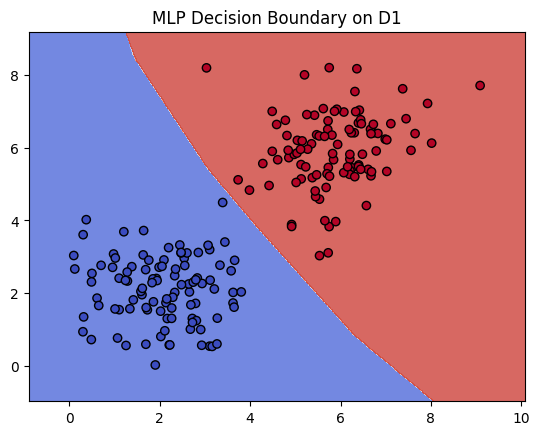

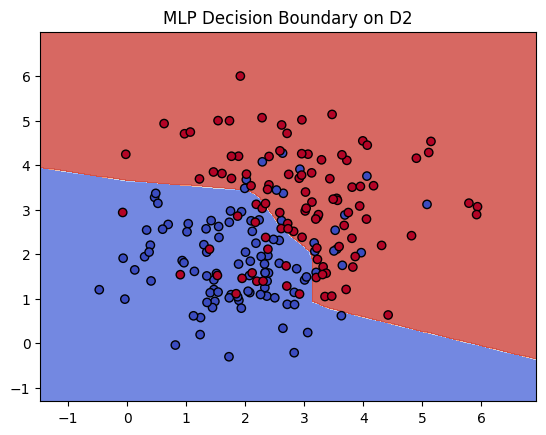

MLP results on D1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy on D1: 1.0

MLP results on D2:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.74      0.74      0.74        19

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

Accuracy on D2: 0.75


In [5]:
from sklearn.neural_network import MLPClassifier


mlp_D1 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_D2 = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=42)

mlp_D1.fit(X_train_D1, y_train_D1)
y_pred_mlp_D1 = mlp_D1.predict(X_test_D1)

mlp_D2.fit(X_train_D2, y_train_D2)
y_pred_mlp_D2 = mlp_D2.predict(X_test_D2)


def plot_mlp_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()


plot_mlp_boundaries(mlp_D1, X_D1, y_D1, 'MLP Decision Boundary on D1')
plot_mlp_boundaries(mlp_D2, X_D2, y_D2, 'MLP Decision Boundary on D2')


print("MLP results on D1:")
print(classification_report(y_test_D1, y_pred_mlp_D1))
print("Accuracy on D1:", accuracy_score(y_test_D1, y_pred_mlp_D1))

print("\nMLP results on D2:")
print(classification_report(y_test_D2, y_pred_mlp_D2))
print("Accuracy on D2:", accuracy_score(y_test_D2, y_pred_mlp_D2))


We tested an MLP (Multi-layer Perceptron) on two datasets to see how it performs with different data complexities. For Dataset D1, where the data is clearly separated into two groups, we used an MLP with two layers of 10 neurons each. This setup achieved 100% accuracy, as shown by the decision boundary plot where the MLP clearly distinguished between the two groups.

In contrast, for Dataset D2, which has overlapping data points, we increased the complexity of the MLP by using 20 neurons in the first layer. This approach improved the model's ability to handle the complexity, but it still wasn't perfect, achieving only about 75% accuracy. The decision boundary for D2 illustrates the challenge, showing some misclassified points due to the overlap.

This experience taught us that while MLPs are excellent for clear-cut data, they face challenges with more complex datasets. Adjusting the MLP's structure can help to an extent, but there are limits to what it can handle if the dataset is particularly challenging.

We could maybe use more hidden layers or change the number of neurons in each layer.
We should maybe use more advanced methods like feature scaling. With MLP I could seperate the data as this much. Maybe a different dataset would give a better result when MLP is used.